In [1]:
# Sample API
import flowx
import numpy as np
import examples.poisson.simulation as simulation
flowx.__version__
import matplotlib.pyplot as plt

In [2]:
#Start from a grid with this number of grid points 
value=10 #Minimum grid resolution
N=value
N_max= 25 #Maximum grid resolution


#Initialize matrices to store data for different types of grids
k=np.zeros(500)
l=np.zeros(500)
m=np.zeros(500)
p=np.zeros(500)
q=np.zeros(500)
ites_p=np.zeros(500)
ites_q=np.zeros(500)
ites_cg=np.zeros(500)
Del_x_sq=np.zeros(500)
mtx_lu=np.zeros(500)
mtx_di=np.zeros(500)
mtx_cg=np.zeros(500)
exec_solv_lu=np.zeros(500)
exec_solv_di=np.zeros(500)
exec_solv_cg=np.zeros(500)
Resid_lu=np.zeros(500)
Resid_di=np.zeros(500)
Resid_cg=np.zeros(500)
Resid_jac=np.zeros(500)
Resid_gs=np.zeros(500)


step = 1 #step from grid to grid resolution

#Solve for different grid resolutions until the grid points become N_max-1 in each direction 
while N<N_max:
    nx, ny =N,N
    xmin, xmax = 0.0, 1.0
    ymin, ymax = 0.0, 1.0
    
    

    # Define cell-centered variable names
    center_vars = ['asol', 'ivar_lu','ivar_direct_inversion','ivar_conjugate_gradient','ivar_jacobi','ivar_gs', 'rvar', 'eror_lu','eror_direct_inversion','eror_conjugate_gradient','eror_jacobi','eror_gs', 'resid_lu', 'resid_direct_inversion','resid_conjugate_gradient','resid_jacobi', 'resid_gs','b_lu','b_direct_inversion','b_conjugate_gradient','b_jacobi', 'b_gs','error_jac_max','error_gs_max']

    # Define names of methods of solutions
    method=['lu','direct_inversion','conjugate_gradient','jacobi','gs']

    # Define boundary condition for the poisson test
    user_bc = 'dirichlet'

    # Define boundary conditions for variable ivar
    bc_type = {'ivar_lu': [user_bc, user_bc, user_bc, user_bc],'ivar_direct_inversion': [user_bc, user_bc, user_bc, user_bc],'ivar_conjugate_gradient': [user_bc, user_bc, user_bc, user_bc],'ivar_jacobi': [user_bc, user_bc, user_bc, user_bc],'ivar_gs': [user_bc, user_bc, user_bc, user_bc]}
    bc_val  = {'ivar_lu': [0.0, 0.0, 0.0, 0.0],'ivar_direct_inversion': [0.0, 0.0, 0.0, 0.0],'ivar_conjugate_gradient': [0.0, 0.0, 0.0, 0.0],'ivar_jacobi': [0.0, 0.0, 0.0, 0.0],'ivar_gs': [0.0, 0.0, 0.0, 0.0]}

    # Create the grid and data
    grid = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type, user_bc_val=bc_val)
    
    #Define grid spacing 
    dx=grid.dx
    
    
    #Get analytical solution and the RHS
    simulation.get_analytical(grid, 'asol', user_bc)
    simulation.get_rhs(grid, 'rvar', user_bc)
    
    #Solve using different types of solvers
    execution_A_lu,execution_lu=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_lu','lu', 'error_jac_max','asol',verbose=False)

    execution_A_di,execution_di=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_direct_inversion','direct_inversion','error_jac_max','asol',verbose=False)

    execution_A_cg,execution_cg=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_conjugate_gradient','conjugate_gradient','error_jac_max','asol',verbose=False)

    ites_jac,execution_jac, eror_jac, iteS_jac=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_jacobi','jacobi','error_jac_max','asol',maxiter=60000,verbose=False)

    ites_gs,execution_gs, eror_gs, iteS_gs=flowx.poisson.solvers(grid,user_bc,'rvar','ivar_gs','gs','error_gs_max','asol',maxiter=60000, verbose=False)

    
    #Get the maximum errror for every grid case
    grid.get_error('eror_lu', 'ivar_lu', 'asol')
    lmax_norm_lu = grid.get_l_max_norm('eror_lu')
    
    grid.get_error('eror_direct_inversion', 'ivar_direct_inversion', 'asol')
    lmax_norm_di = grid.get_l_max_norm('eror_direct_inversion')
    
    grid.get_error('eror_conjugate_gradient', 'ivar_conjugate_gradient', 'asol')
    lmax_norm_cg = grid.get_l_max_norm('eror_conjugate_gradient')
    
    grid.get_error('eror_jacobi', 'ivar_jacobi', 'asol')
    lmax_norm_jacobi = grid.get_l_max_norm('eror_jacobi')
    
    grid.get_error('eror_gs', 'ivar_gs', 'asol')
    lmax_norm_gs = grid.get_l_max_norm('eror_gs')
    
    #residual
    grid.get_laplacian('b_lu','ivar_lu')
    grid.get_error('resid_lu', 'b_lu', 'rvar')
    resid_lu =grid.get_l_max_norm('resid_lu')
    
    grid.get_laplacian('b_direct_inversion','ivar_direct_inversion')
    grid.get_error('resid_direct_inversion', 'b_direct_inversion', 'rvar')
    resid_di =grid.get_l_max_norm('resid_direct_inversion')
    
    grid.get_laplacian('b_conjugate_gradient','ivar_conjugate_gradient')
    grid.get_error('resid_conjugate_gradient', 'b_conjugate_gradient', 'rvar')
    resid_cg =grid.get_l_max_norm('resid_conjugate_gradient')
    
    #grid.get_laplacian('b_jacobi','ivar_jacobi')
    #grid.get_error('resid_jacobi', 'b_jacobi', 'rvar')
    #resid_jac =grid.get_l_max_norm('resid_jacobi')
    
    #grid.get_laplacian('b_gs','ivar_gs')
    #grid.get_error('resid_gs', 'b_gs', 'rvar')
    #resid_gs =grid.get_l_max_norm('resid_gs')
    
    
    k[N]= lmax_norm_lu
    l[N]= lmax_norm_di
    m[N]= lmax_norm_cg
    p[N]= lmax_norm_jacobi
    q[N]= lmax_norm_gs
    
    Del_x_sq[N]=dx**2
    
    ites_p[N]=ites_jac
    ites_q[N]=ites_gs
    
    
    mtx_lu[N]= execution_A_lu
    mtx_di[N]= execution_A_di
    mtx_cg[N]= execution_A_cg
    
    exec_solv_lu[N]=execution_lu
    exec_solv_di[N]=execution_di
    exec_solv_cg[N]=execution_cg
    
#     Resid_lu[N]=resid_lu
#     Resid_di[N]=resid_di
#     Resid_cg[N]=resid_cg
#     Resid_jac[N]=resid_jac
#     Resid_gs[N]=resid_gs
    
   
    N=N+step   

In [3]:
N=np.arange(value,N,step)
np.size(N)

15

In [4]:
A=k[value:np.size(N)+value:step]
B=l[value:np.size(N)+value:step]
C=m[value:np.size(N)+value:step]
D=p[value:np.size(N)+value:step]
H=q[value:np.size(N)+value:step]


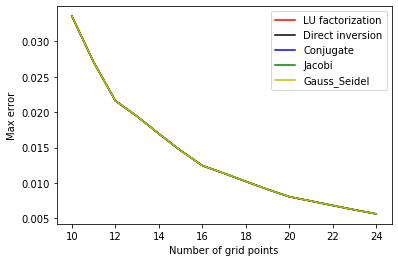

In [5]:
ax = plt.subplot(111)
ax.plot(N, A,'r', label='LU factorization')
ax.plot(N, B,'k',label='Direct inversion')
ax.plot(N,C,'b',label='Conjugate')
ax.plot(N,D,'g',label='Jacobi')
ax.plot(N,H,'y',label='Gauss_Seidel')
plt.xlabel('Number of grid points')
plt.ylabel('Max error')

ax.legend()
plt.show()
#plt.savefig('CFD_max_error_grid_resolution_dirichlet_1.png')

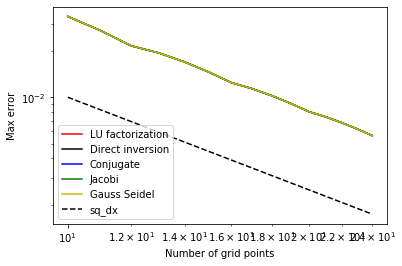

In [6]:
ax = plt.subplot(111)
ax.plot(N, A,'r', label='LU factorization')
ax.plot(N, B,'k',label='Direct inversion')
ax.plot(N,C,'b',label='Conjugate')
ax.plot(N,D,'g',label='Jacobi')
ax.plot(N,H,'y',label='Gauss Seidel')
ax.plot(N,Del_x_sq[value:np.size(N)+value:step],'--k',label='sq_dx')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of grid points')
plt.ylabel('Max error')
ax.legend()
plt.show()
#plt.savefig('CFD_max_error_grid_resolution_log_log_dirichlet_1.png')

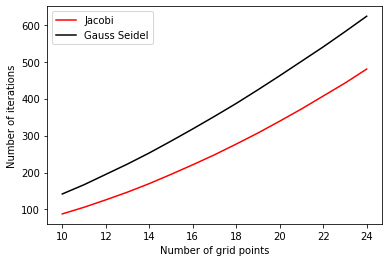

In [7]:
ax = plt.subplot(111)
ax.plot(N, ites_p[value:np.size(N)+value:step],'r', label='Jacobi')
ax.plot(N, ites_q[value:np.size(N)+value:step],'k',label='Gauss Seidel')

plt.xlabel('Number of grid points')
plt.ylabel('Number of iterations')
ax.legend()
plt.show()
#plt.savefig('iters_no_of_points.png')

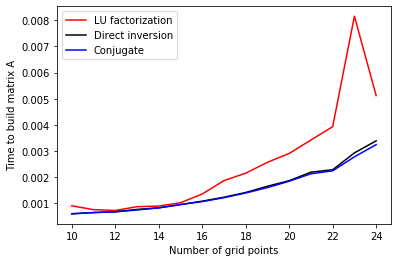

In [8]:
ax = plt.subplot(111)
ax.plot(N, mtx_lu[value:np.size(N)+value:step],'r', label='LU factorization')
ax.plot(N,mtx_di[value:np.size(N)+value:step],'k',label='Direct inversion')
ax.plot(N,mtx_cg[value:np.size(N)+value:step],'b',label='Conjugate')
plt.xlabel('Number of grid points')
plt.ylabel('Time to build matrix A')
ax.legend()
plt.show()

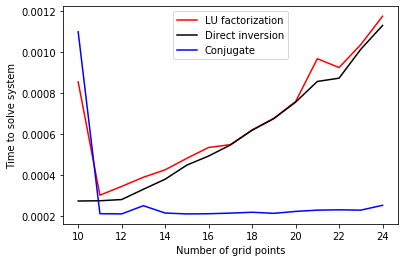

<Figure size 432x288 with 0 Axes>

In [9]:
ax = plt.subplot(111)
ax.plot(N,exec_solv_lu[value:np.size(N)+value:step],'r', label='LU factorization')
ax.plot(N,exec_solv_di[value:np.size(N)+value:step],'k',label='Direct inversion')
ax.plot(N,exec_solv_cg[value:np.size(N)+value:step],'b',label='Conjugate')
plt.xlabel('Number of grid points')
plt.ylabel('Time to solve system')
ax.legend()
plt.show()
plt.savefig('time_points_dirichl')

In [10]:
# ax = plt.subplot(111)
# ax.plot(N,Resid_lu[value:np.size(N)+value:step],'r', label='LU factorization')
# ax.plot(N,Resid_di[value:np.size(N)+value:step],'k',label='Direct inversion')
# ax.plot(N,Resid_cg[value:np.size(N)+value:step],'b',label='Conjugate')
# ax.plot(N,Resid_jac[value:np.size(N)+value:step],'g',label='Jacobi')
# #ax.plot(ites_p[8:np.size(N)+8:step],Resid_jac[8:np.size(N)+8:step],'g',label='Jacobi')
# ax.plot(N,Resid_gs[value:np.size(N)+value:step],'y',label='Gauss_Seidel')
# plt.xlabel('Number of grid points')
# plt.ylabel('Residual')
# ax.legend()
# plt.show()


In [11]:
# ax = plt.subplot(111)
# ax.plot(N,Resid_lu[value:np.size(N)+value:step],'r', label='LU factorization')
# ax.plot(N,Resid_di[value:np.size(N)+value:step],'k',label='Direct inversion')
# ax.plot(N,Resid_cg[value:np.size(N)+value:step],'b',label='Conjugate')
# ax.plot(N,Resid_jac[value:np.size(N)+value:step],'g',label='Jacobi')
# ax.plot(N,Del_x_sq[value:np.size(N)+value:step],'--k',label='sq_dx')
# #ax.plot(ites_p[8:np.size(N)+8:step],Resid_jac[8:np.size(N)+8:step],'g',label='Jacobi')
# plt.xscale('log')
# plt.yscale('log')
# ax.plot(N,Resid_gs[value:np.size(N)+value:step],'y',label='Gauss_Seidel')
# plt.xlabel('Number of grid points')
# plt.ylabel('Residual')
# ax.legend()
# plt.show()



In [12]:
#a=grid.get_values('rvar')
#a
#a[1:-1,1:-1]
#numpy.amax(grid.get_values('rvar'))

In [13]:
#b=grid.get_values('b_lu')
#b
#b[1:-1,1:-1]
#numpy.amax(grid.get_values('b_lu'))

In [14]:
#numpy.amax(a[1:-1,1:-1]-b[1:-1,1:-1])

In [15]:
# plt.plot(iteS_jac[0:5756],eror_jac[0:5756],'b',label = "Jacobi")
# plt.plot(iteS_gs[0:6222],eror_gs[0:6222],'r',label = "Gauss-Seidel")
# plt.xlabel('Number of iterations')
# plt.ylabel('Max error')
# plt.xlim(-0.5,2500)
# plt.ylim(0, 1)
# plt.legend()
#plt.savefig('converg_neumann_90_90.png')